# EDA PREDICTION

In [43]:
import json
import pandas as pd
from sqlalchemy import create_engine
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

In [44]:
def load_config():
    """load config function"""
    try:
        with open('../config/database.json', 'r') as config_file:
            return json.load(config_file)
    except Exception as e:
        print(f"Failed to load config: {e}")
        return {}


config = load_config()

user = config.get('user')
password = config.get('password')
host = config.get('host')
dbname = config.get('dbname')
port = config.get('port')
DATABASE_URL = f"postgresql://{user}:{password}@{host}:{port}/{dbname}"

engine = create_engine(DATABASE_URL)

def load_table_data(table_name):
    try:
        df = pd.read_sql_table(table_name, con=engine)
        print(f"Load data from {table_name}")
        return df
    except Exception as e:
        print(f"Error loading data from {table_name}: {e}")
        return pd.DataFrame()  

table_name = 'prediction'
df = load_table_data(table_name)

Load data from prediction


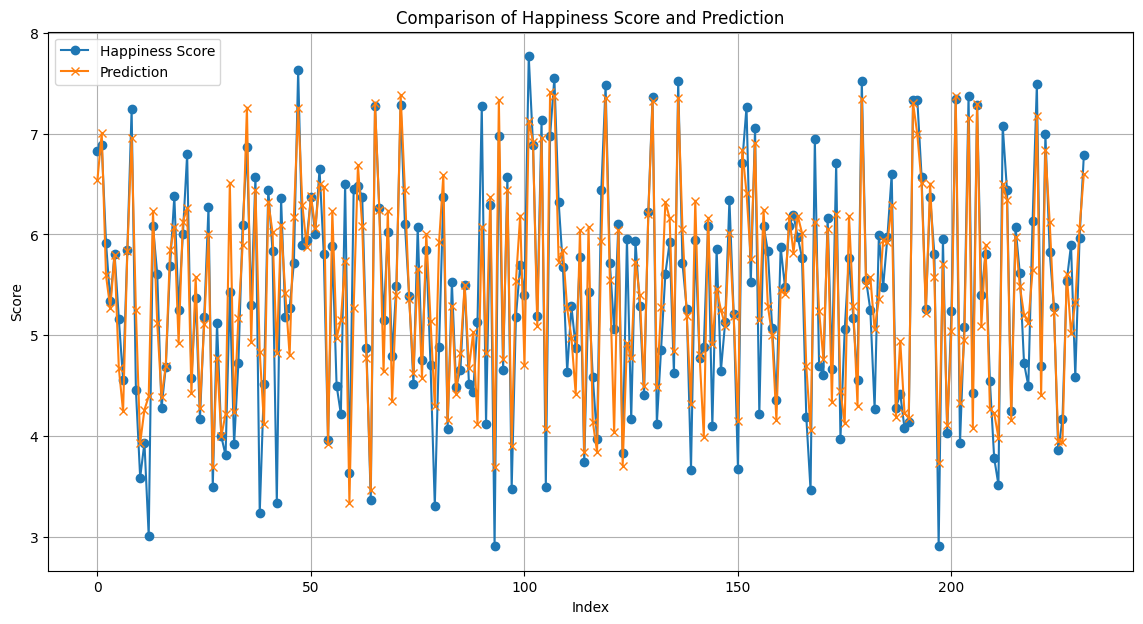

In [45]:
plt.figure(figsize=(14, 7))
plt.plot(df['HAPPINESS_SCORE'], label='Happiness Score', marker='o')
plt.plot(df['HAPPINESS_PREDICTION'], label='Prediction', marker='x')
plt.title('Comparison of Happiness Score and Prediction')
plt.xlabel('Index')
plt.ylabel('Score')
plt.legend()
plt.grid(True)
plt.show()

In [46]:
R2_score = round(r2_score(df['HAPPINESS_SCORE'], df['HAPPINESS_PREDICTION']), 2)
print('The model has an accuracy of:', R2_score, '%')

The model has an accuracy of: 0.84 %
